In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#returns shortfall percentage 
def count_shortfalls(data):
    sf_count = 0
    for i in range(data.shape[0]):
        if data[i] > 10:
            sf_count = sf_count + 1
    sf_count = sf_count / data.shape[0]
    return sf_count

In [6]:
#a = []
# a.append(np.genfromtxt("Stochastic30calls1000.csv", delimiter=" "))
# a.append(np.genfromtxt("Stochastic35calls1000.csv", delimiter=" "))
# a.append(np.genfromtxt("Stochastic40calls1000.csv", delimiter=" "))
# a.append(np.genfromtxt("Stochastic45calls1000.csv", delimiter=" "))
# a.append(np.genfromtxt("Stochastic50calls1000.csv", delimiter=" "))


In [9]:
plt.violinplot(a,showmeans=True)
plt.ylim([0, 100])

NameError: name 'a' is not defined

In [10]:
original_data = (np.genfromtxt("backend_calls.csv", delimiter=","))
original_data_s = (np.genfromtxt("backend_calls.csv", delimiter=",", dtype = str))

In [11]:
original_data_s[0,6:]

array(['Time_Assigned', 'Time_Enroute', 'Time_ArrivedAtScene',
       'Time_Depart_Scene', 'Time_Arrive_Destination', 'Time_Available',
       'Time_Call_Cleared', 'Call_Disposition', 'Longitude_Of_Emergency',
       'Latitude_Of_Emergency', 'transport_time', 'grid_time',
       'Time_Arrived', 'timedelta', 'arrival_seconds',
       'interarrival_seconds', 'neighborhood', 'dow'], dtype='<U30')

In [66]:
ncalls = 1000;
travel_time = original_data[1:,-8];
travel_time = travel_time / 60;
grid_time = original_data[1:ncalls,-7];
grid_time = grid_time / 60;
stoch40 = np.genfromtxt("Stochastic40calls1000.csv", delimiter=" ");
stoch50 = np.genfromtxt("Stochastic50calls1000.csv", delimiter=" ");
robust40 = np.genfromtxt("Robust0140calls1000.csv", delimiter=" ");
robust50 = np.genfromtxt("Robust0150calls1000.csv", delimiter=" ");

424

In [81]:
stoch40.shape[0]

1000

In [23]:
#0 minute travel time is impossible, so should we delete it?
travel_time 
zero_ind = np.where(travel_time >= 1)
np.mean(travel_time[zero_ind])
travel_time = travel_time[zero_ind]

In [45]:
np.mean(stoch40) 

10.344299999999999

In [25]:
np.mean(stoch50) * .92 
#travel time -8.147
#robust - 7.75
#stochastic - 8.34

8.347083333333332

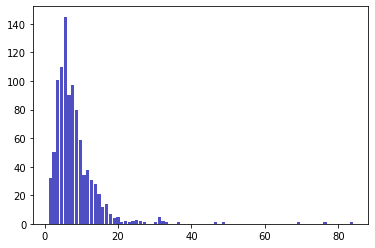

In [26]:
# Density plot
n, bins, patches = plt.hist(x=travel_time, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [83]:
stoch40_c = np.genfromtxt("Stochastic40calls1000closest.csv", delimiter=" ");
stoch40_l = np.genfromtxt("Stochastic40calls1000lists.csv", delimiter=" ");
stoch40_u = np.genfromtxt("Stochastic40calls1000closest_xuniform.csv", delimiter=" ");

In [87]:
print(count_shortfalls(stoch40_c))
print(count_shortfalls(stoch40_l))
print(count_shortfalls(stoch40_u))

424
761
432


(0.0, 20.0)

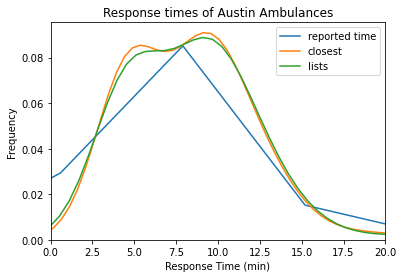

In [84]:
modifier = .92
sns.kdeplot(travel_time)
#sns.kdeplot(grid_time)
#sns.kdeplot(stoch40*modifier)
sns.kdeplot(stoch40_c*modifier)
#sns.kdeplot(robust40*modifier)
sns.kdeplot(stoch40_u*modifier)
plt.legend(['reported time', 'closest', 'lists'])
plt.xlabel("Response Time (min)")
plt.ylabel("Frequency")
plt.title("Response times of Austin Ambulances")
plt.xlim([0, 20])

In [11]:
batch1 = np.genfromtxt("Robust0150calls1000batch1.csv", delimiter=" ");
batch2 = np.genfromtxt("Robust0150calls1000batch2.csv", delimiter=" ");
batch3 = np.genfromtxt("Robust0150calls1000batch3.csv", delimiter=" ");
batch4 = np.genfromtxt("Robust0150calls1000batch4.csv", delimiter=" ");
batch5 = np.genfromtxt("Robust0150calls1000batch5.csv", delimiter=" ");
batch6 = np.genfromtxt("Robust0150calls1000batch6.csv", delimiter=" ");
batch7 = np.genfromtxt("Robust0150calls1000batch7.csv", delimiter=" ");
batch8 = np.genfromtxt("Robust0150calls1000batch8.csv", delimiter=" ");
batch9 = np.genfromtxt("Robust0150calls1000batch9.csv", delimiter=" ");
batch10 = np.genfromtxt("Robust0150calls1000batch10.csv", delimiter=" ");
batch11 = np.genfromtxt("Robust0150calls1000batch11.csv", delimiter=" ");
batch12 = np.genfromtxt("Robust0150calls1000batch12.csv", delimiter=" ");


(0.0, 30.0)

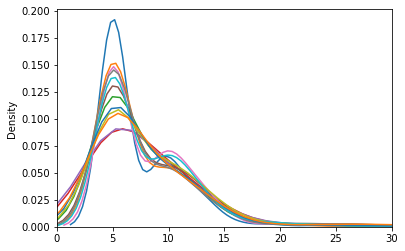

In [12]:
sns.kdeplot(batch1)
sns.kdeplot(batch2)
sns.kdeplot(batch3)
sns.kdeplot(batch4)
sns.kdeplot(batch5)
sns.kdeplot(batch6)
sns.kdeplot(batch7)
sns.kdeplot(batch8)
sns.kdeplot(batch9)
sns.kdeplot(batch10)
sns.kdeplot(batch11)
sns.kdeplot(batch12)
plt.xlim([0, 30])